## Pandas
- Able to read CSV, Excel spreadsheets, HTML tables, JSON, SQL and more

## Basic Operations of Pandas

In [1]:
# download file needed for our practises
from urllib.request import urlretrieve

italy_covid_url = "https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv"
urlretrieve(italy_covid_url, "italy-covid-daywise.csv")

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x1d371b67e50>)

In [3]:
import pandas as pd
df = pd.read_csv("italy-covid-daywise.csv")
df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [4]:
# it's a pandas dataframe
type(df)

pandas.core.frame.DataFrame

In [5]:
# get the info abt dataframe
df.info()

# observation
# total of 248 records/rows
# there're 113 null in new_tests

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [6]:
# statistical info of table
df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [7]:
df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [8]:
df.shape

(248, 4)

## Retrieving Data from Dataframe

In [9]:
# Pandas format is simliar to this
covid_data_dict = {
    'date':       ['2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03'],
    'new_cases':  [1444, 1365, 996, 975, 1326],
    'new_deaths': [1, 4, 6, 8, 6],
    'new_tests': [53541, 42583, 54395, None, None]
}

In [10]:
# in dataframe, each column is a series (numpy array with some extra properties)
type(df["new_cases"])

pandas.core.series.Series

In [11]:
# retrieve element at specific row and column
df.at[230, "new_cases"]

477.0

In [12]:
# or 
df["new_cases"][230]

477.0

In [15]:
# access a subset of the df
cases_df = df[["date", "new_cases"]]
cases_df

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0


In [16]:
# make a full copy
df_copy = df.copy()

In [18]:
# access a specific row
# row retireved is a series too
df.loc[120]

date          2020-04-29
new_cases         2091.0
new_deaths         382.0
new_tests        38589.0
Name: 120, dtype: object

In [45]:
# slicing -> df.loc[inclusive:inclusive, column names]
print(df.loc[120, "new_cases"])
print(df.loc[1:5, ("new_cases", "new_tests")])
print(df.loc[(1, 3, 5), ("new_cases", "new_tests")])
print(df.loc[[1, 3, 5], ["new_cases", "new_tests"]])

2091.0
   new_cases  new_tests
1        0.0        NaN
2        0.0        NaN
3        0.0        NaN
4        0.0        NaN
5        0.0        NaN
   new_cases  new_tests
1        0.0        NaN
3        0.0        NaN
5        0.0        NaN
   new_cases  new_tests
1        0.0        NaN
3        0.0        NaN
5        0.0        NaN


In [47]:
# slicing -> df.loc[inclusive:exclusive, inclusive:exclusive]
print(df.iloc[120, 1])
print(df.iloc[1:5, 1:3])
print(df.iloc[[1, 3, 5], [1, 3]])

# no working
# print(df.iloc[(1, 3, 5), (1, 3)])

2091.0
   new_cases  new_deaths
1        0.0         0.0
2        0.0         0.0
3        0.0         0.0
4        0.0         0.0
   new_cases  new_tests
1        0.0        NaN
3        0.0        NaN
5        0.0        NaN


In [25]:
# first n rows
df.head(7)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
5,2020-01-05,0.0,0.0,NaN
6,2020-01-06,0.0,0.0,NaN


In [26]:
# last n rows
df.tail(9)

,date,new_cases,new_deaths,new_tests
239,2020-08-26,876.0,4.0,58054.0
240,2020-08-27,1366.0,13.0,57640.0
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


In [27]:
# first index that doesn't contain NaN value
df["new_tests"].first_valid_index()

111

In [48]:
# n random sample of rows
df.sample(9)

,date,new_cases,new_deaths,new_tests
51,2020-02-20,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
223,2020-08-10,463.0,2.0,10904.0
181,2020-06-29,174.0,22.0,15484.0
106,2020-04-15,2972.0,604.0,NaN
200,2020-07-18,231.0,11.0,27569.0
70,2020-03-10,1797.0,98.0,NaN
227,2020-08-14,522.0,6.0,24868.0
244,2020-08-31,1365.0,4.0,42583.0


## Analyzing Data 

In [54]:
# since series is similar to numpy array, we can use array's methods
total_cases = df["new_cases"].sum()
total_deaths = df["new_deaths"].sum()
print("Total cases: {}".format(total_cases))
print("Total deaths: {}".format(total_deaths))
print("Death Rate: {:.2f}%".format(total_deaths/total_cases*100))

Total cases: 271515.0
Total deaths: 35497.0
Death Rate: 13.07%


## Querying and Sorting Rows

In [55]:
more_than_100 = df["new_cases"]>100
more_than_100

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245     True
246     True
247     True
Name: new_cases, Length: 248, dtype: bool

In [56]:
df[more_than_100]

,date,new_cases,new_deaths,new_tests
59,2020-02-28,250.0,5.0,NaN
60,2020-02-29,238.0,4.0,NaN
61,2020-03-01,240.0,8.0,NaN
62,2020-03-02,561.0,6.0,NaN
63,2020-03-03,347.0,17.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [57]:
# thus, in short we can write this as
more_than_100 = df[df["new_cases"]>100]
more_than_100

,date,new_cases,new_deaths,new_tests
59,2020-02-28,250.0,5.0,NaN
60,2020-02-29,238.0,4.0,NaN
61,2020-03-01,240.0,8.0,NaN
62,2020-03-02,561.0,6.0,NaN
63,2020-03-03,347.0,17.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [59]:
# to display all rows w/o hiding
from IPython.display import display
with pd.option_context("display.max_rows", 100):
    display(df[df["new_cases"]> 1000])

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
77,2020-03-17,4000.0,347.0,NaN
78,2020-03-18,3526.0,347.0,NaN


In [64]:
# querying days when ratio of cases to tests conducted is higher than the overall positive_rate
# total of 935310 tests were conducted before daily test numbers were reported.
positive_rate = df["new_cases"].sum() / (df["new_tests"].sum()+935310)

high_ratio_df = df[(df["new_cases"]/df["new_tests"])>positive_rate]
high_ratio_df

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
120,2020-04-29,2091.0,382.0,38589.0
123,2020-05-02,1965.0,269.0,31231.0
124,2020-05-03,1900.0,474.0,27047.0


In [68]:
# add new column
df["positive_rate"] = df["new_cases"] / df["new_tests"]
df.head()

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN


In [69]:
# drop column
df.drop(columns=["positive_rate"], inplace=True)
df.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


## Sorting Using Column Values

In [71]:
df.sort_values("new_cases", ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


In [75]:
df.sort_values("new_cases").head(10)
# Oh No! There's a negaative new_cases!

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN
34,2020-02-03,0.0,0.0,NaN
36,2020-02-05,0.0,0.0,NaN
37,2020-02-06,0.0,0.0,NaN
38,2020-02-07,0.0,0.0,NaN


Alternatives:
1. Replace w/ 0
2. w/ avg of entire column
3. w/ avg of value on previous and next date
4. Discard the row entirely


In [76]:
# replace w/ avg of value on previous and next date
df.at[172, "new_cases"] = (df.at[171, 'new_cases']+df.at[173, "new_cases"]/2)
df.loc[172, "new_cases"]

463.0

## Working w/ Dates

In [78]:
# it's an object that Pandas doesn't know that it's a date
df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

In [80]:
# convert into datetime
df["date"] = pd.to_datetime(df.date)
df["date"]

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [83]:
# extrating weekday, day, month, year and add as new columns
df["year"] = pd.DatetimeIndex(df.date).year
df["month"] =  pd.DatetimeIndex(df.date).month
df["day"] = pd.DatetimeIndex(df.date).day
df["weekday"] = pd.DatetimeIndex(df.date).weekday

df.head()

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5


In [86]:
# querying rows for May
may_df = df[df["month"]==5]
may_df_metrics = may_df[["new_cases", "new_deaths", "new_tests"]]
may_df_totals = may_df_metrics.sum()
may_df_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

## Grouping & Aggregation

In [88]:
# group by month, aggregate columns using sum
month_df = df.groupby("month")[["new_cases", "new_deaths", "new_tests"]].sum()

month_df
# index: month

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8383.0,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [89]:
# aggregate by mean
df_month_mean = df.groupby("month")[["new_cases", "new_deaths", "new_tests"]].mean()

df_month_mean

,new_cases,new_deaths,new_tests
month,,,
1,0.096774,0.000000,NaN
2,30.517241,0.724138,NaN
3,3253.258065,373.225806,NaN
4,3395.066667,536.366667,38144.636364
5,937.838710,182.516129,34797.419355
6,279.433333,46.800000,27678.466667
7,216.838710,12.516129,25732.000000
8,679.354839,11.129032,35442.064516
9,1099.000000,6.666667,54395.000000


In [90]:
# cumalative sum
df["total_cases"] = df["new_cases"].cumsum()
df["total_deaths"] = df["new_deaths"].cumsum()
# total of 935310 tests were conducted before daily test numbers were reported.
df["total_tests"] = df["new_tests"].cumsum() + 935310

df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267464.0,35473.0,5117788.0
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268829.0,35477.0,5160371.0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269825.0,35483.0,5214766.0
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270800.0,35491.0,NaN


## Merging Data from Multiple Sources

In [91]:
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')

location_df = pd.read_csv("locations.csv")

location_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [92]:
location_df[location_df["location"] == "Italy"]

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [93]:
df["location"] = "Italy"
df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267464.0,35473.0,5117788.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268829.0,35477.0,5160371.0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269825.0,35483.0,5214766.0,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270800.0,35491.0,NaN,Italy


In [95]:
# merging df and location_df
merged_df = df.merge(location_df, on="location")
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267464.0,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268829.0,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269825.0,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270800.0,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [96]:
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population

merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population

merged_df['tests_per_million'] = merged_df.total_tests * 1e6 / merged_df.population

merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267464.0,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4423.683650,586.700753,84644.943252
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268829.0,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4446.259878,586.766910,85349.238862
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269825.0,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4462.733082,586.866146,86248.897403
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270800.0,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4478.858959,586.998461,NaN


## Writing Back to File

In [98]:
result_df = merged_df[
                        ['date',
                       'new_cases', 
                       'total_cases', 
                       'new_deaths', 
                       'total_deaths', 
                       'new_tests', 
                       'total_tests', 
                       'cases_per_million', 
                       'deaths_per_million', 
                       'tests_per_million']
                    ]
result_df

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,267464.0,1.0,35473.0,53541.0,5117788.0,4423.683650,586.700753,84644.943252
244,2020-08-31,1365.0,268829.0,4.0,35477.0,42583.0,5160371.0,4446.259878,586.766910,85349.238862
245,2020-09-01,996.0,269825.0,6.0,35483.0,54395.0,5214766.0,4462.733082,586.866146,86248.897403
246,2020-09-02,975.0,270800.0,8.0,35491.0,NaN,NaN,4478.858959,586.998461,NaN


In [99]:
result_df.to_csv("results.csv", index=None)

In [100]:
import os
os.listdir(".")

['.ipynb_checkpoints',
 'climate.txt',
 'climate_resultx.txt',
 'course1N2_note.ipynb',
 'course2_exercises.ipynb',
 'course3_note.ipynb',
 'course4_note.ipynb',
 'italy-covid-daywise.csv',
 'locations.csv',
 'movies.csv',
 'movies2.csv',
 'results.csv']

## Plotting in Pandas

<AxesSubplot:>

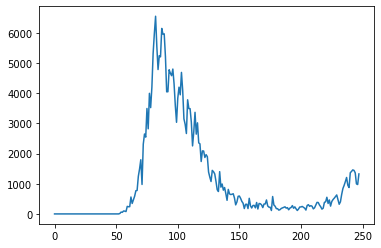

In [101]:
result_df["new_cases"].plot()

In [102]:
result_df.set_index("date", inplace=True)
result_df

,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
date,,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
2020-08-30,1444.0,267464.0,1.0,35473.0,53541.0,5117788.0,4423.683650,586.700753,84644.943252
2020-08-31,1365.0,268829.0,4.0,35477.0,42583.0,5160371.0,4446.259878,586.766910,85349.238862
2020-09-01,996.0,269825.0,6.0,35483.0,54395.0,5214766.0,4462.733082,586.866146,86248.897403


<AxesSubplot:xlabel='date'>

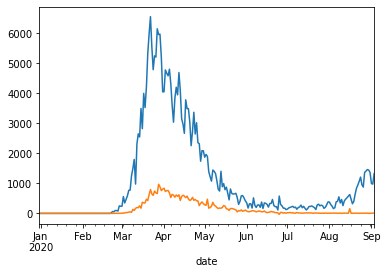

In [103]:
# now, out x-axis is month (something more meaningful)
result_df["new_cases"].plot()
result_df["new_deaths"].plot()

<AxesSubplot:xlabel='date'>

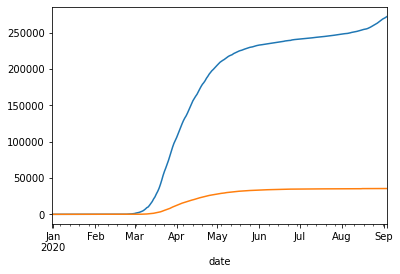

In [104]:
# cumalative plot
result_df["total_cases"].plot()
result_df["total_deaths"].plot()

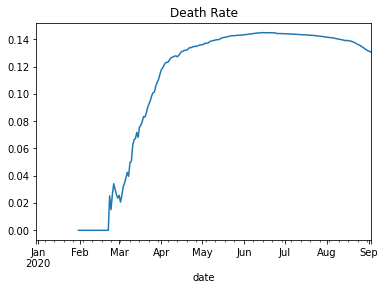

In [105]:
death_rate = result_df.total_deaths / result_df.total_cases
death_rate.plot(title='Death Rate');

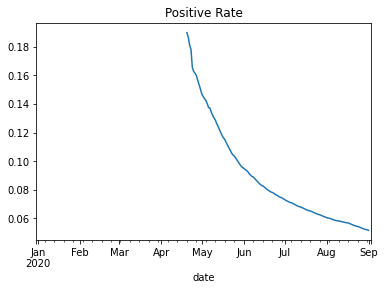

In [106]:
positive_rates = result_df.total_cases / result_df.total_tests
positive_rates.plot(title='Positive Rate');

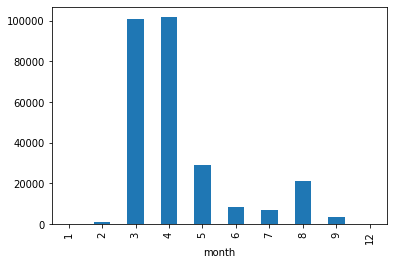

In [108]:
month_df.new_cases.plot(kind='bar');

<AxesSubplot:xlabel='month'>

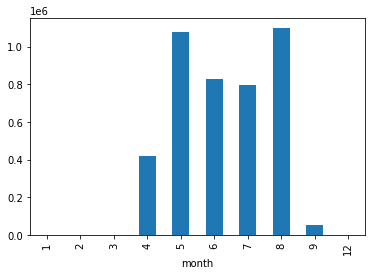

In [109]:
month_df.new_tests.plot(kind='bar')